In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset w/ added uniform noise

In [9]:
noise_range = .1

noise = noise_range * np.random.rand(1000,1)
x = (10* np.random.rand(1000,1) -5 + noise)


In [10]:
noise = noise_range * np.random.rand(1000,1)
y = 5 + 7*x + 2*x**2 - 0.5*x**3  + noise

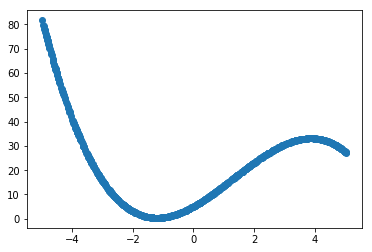

In [11]:
plt.scatter(x,y)

## FX adds new columns to dataset of powers of X

In [12]:
#write a function that adds new columns to the dataset of powers of x, up to and including x**n
def new_col(array, n):
    length = len(array)
    # matrix of 0s, length rows by n columns
    matrix = np.zeros((length,n+1))
    
    for i in range(n+1):
        matrix[:,i] = np.reshape(array**(i),(1000,))
    return matrix

In [13]:
#0th – 5th degree
model_degree = 5
matrix = new_col(x,model_degree)

## Linear Regression model fortraining data


In [17]:
def lin_reg(eta, n_iterations, m, matrix):
            
    theta = np.random.randn(matrix.shape[1],1) # 6 x 1 (#of xs)
#     theta = np.random.rand(matrix.shape[1],1)*10 - 5 

    for iterations in range(n_iterations):    
        gradients = 2/m * matrix.T.dot(matrix.dot(theta) - y)
        theta = theta - eta * gradients
        
        #prints iteration if theta null... informs exploration constant
        if np.isnan(theta).any() == True:
            print(iterations) 
            
    return theta
            
theta = lin_reg(1e-6, 100000,matrix.shape[0],matrix)

## Plot of Final Model

[[ 0.09481539]
 [ 1.16535841]
 [ 2.40484056]
 [ 0.32698225]
 [-0.00621513]
 [-0.02578898]]


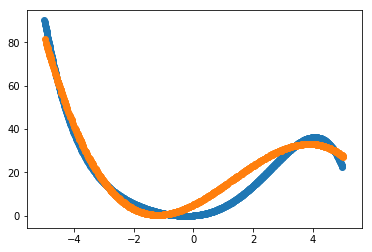

In [18]:
#FIFTH DEGREE POLYNOMIAL MODEL

# 1000 pts in range btwn -5,5
model_x = np.linspace(-5,5,1000)

# pass xs through 5th degree polynomial
model_x_aug = new_col(model_x,5)

# apply weights (coefficients)
model_y = model_x_aug.dot(theta)

#plot
plt.scatter(model_x, model_y)
plt.scatter(x,y)
print(theta)

## Different Model Degrees
Note incr. degree requires lower exploration constant (alpha) to remediate divergence

[[ 2.64585791]
 [-0.42577428]
 [ 1.29456688]]


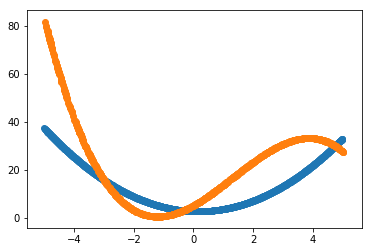

In [21]:
#SECOND DEGREE POLYNOMIAL MODEL

model_x_aug = new_col(model_x,2)

theta = lin_reg(1e-6, 100000, model_x_aug.shape[0], model_x_aug)

model_y = model_x_aug.dot(theta)

plt.scatter(model_x, model_y)
plt.scatter(x,y)
print(theta)

[[ 0.00581124]
 [ 1.34551952]
 [-0.04399475]
 [ 0.03426776]
 [-0.74124862]
 [-0.166114  ]
 [-1.31301552]
 [-0.46891973]
 [ 0.13962748]
 [ 0.02124798]
 [-0.00350542]]


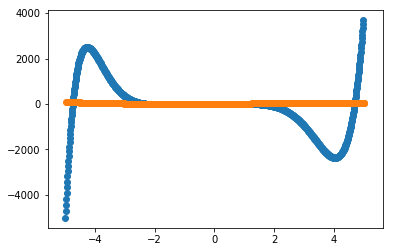

In [31]:
#10TH DEGREE POLYNOMIAL MODEL

model_x_aug = new_col(model_x,10)

theta = lin_reg(1e-13, 1000000, model_x_aug.shape[0], model_x_aug)

model_y = model_x_aug.dot(theta)

plt.scatter(model_x, model_y)
plt.scatter(x,y)
print(theta)